# single network graph calculations

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

#gml_files = glob('../output/network/*/*.gml')

graph = nx.read_gml('../output/network/negative/article1.gml')
ugraph = graph.to_undirected()

## adding back missing edges
# take multidigraph and convert to undirected graph U
# graph U is reciprocal so only missing edges are listed
# take list of missing edges and set = e
# add list e to ugraph = ugraph now contains all info from graph
U = graph.to_undirected(reciprocal=True)
e = U.edges()
ugraph.add_edges_from(e)

In [2]:
def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

In [3]:
# start here

print nx.info(graph)
print nx.info(ugraph)

Name: 
Type: MultiDiGraph
Number of nodes: 140
Number of edges: 147
Average in degree:   1.0500
Average out degree:   1.0500
Name: 
Type: MultiGraph
Number of nodes: 140
Number of edges: 147
Average degree:   2.1000


In [4]:
# degree histogram: returns a list of frequencies of degrees
nx.degree_histogram(graph)

[0, 77, 32, 8, 10, 6, 3, 1, 0, 1, 1, 0, 0, 0, 0, 1]

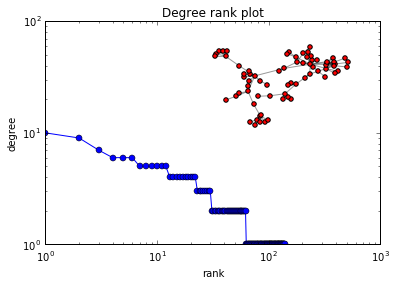

In [5]:
# degree rank plot
# only for undirected type

degree_sequence=sorted(nx.degree(ugraph).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(ugraph), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.show()

In [ ]:
# degree centrality

a = nx.degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['degree centrality']
dfIn = dfIn.sort_values(by=['degree centrality'])
dfIn

In [ ]:
# betweenness centrality

a = nx.betweenness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['betweenness centrality']
dfIn = dfIn.sort_values(by=['betweenness centrality'])
dfIn

In [ ]:
# closeness centrality

a = nx.closeness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['closeness centrality']
dfIn = dfIn.sort_values(by=['closeness centrality'])
dfIn

In [ ]:
# in degree centrality
a = nx.in_degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['in deg centrality']
dfIn = dfIn.sort_values(by=['in deg centrality'])
dfIn

In [ ]:
# out degree centrality
b = nx.out_degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(b,orient='index')
dfIn.columns = ['out deg centrality']
dfIn = dfIn.sort_values(by=['out deg centrality'])
dfIn

- - -

In [ ]:
# current-flow betweenness centrality (graph must be connected; run for largest component)
#nx.current_flow_betweenness_centrality(graph)

# eigenvector centrality

# degree assortativity coefficient
# average neighbor degree; average degree connectivity (k nearest neighbors)

#nx.edge_connectivity(graph)
#nx.node_connectivity(graph)

# clustering coefficient (cannot be multigraph)
# nx.average_clustering(graph)

In [18]:
nx.connected_component_subgraphs(ugraph)

<generator object connected_component_subgraphs at 0x11525ca50>

In [6]:
for cc in nx.connected_component_subgraphs(ugraph):
    print cc, " has ", len(cc.nodes()), " nodes."

  has  5  nodes.
  has  13  nodes.
  has  71  nodes.
  has  10  nodes.
  has  5  nodes.
  has  4  nodes.
  has  2  nodes.
  has  3  nodes.
  has  2  nodes.
  has  4  nodes.
  has  3  nodes.
  has  3  nodes.
  has  4  nodes.
  has  3  nodes.
  has  2  nodes.
  has  2  nodes.
  has  4  nodes.


- - -